In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, pylab
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
sns.set(color_codes=True)

In [20]:
fourpeaks_ga = pd.read_csv('OptimizationResults/04-03-2018_FourPeaksGA.csv', sep=';')
knapsack_ga = pd.read_csv('OptimizationResults/04-03-2018_KnapsackGA.csv', sep=';')
tsp_ga = pd.read_csv('OptimizationResults/04-03-2018_tspGA.csv', sep=',')
all_gas = [tsp_ga, fourpeaks_ga, knapsack_ga]
all_names = ["TSP", "fourpeaks", "knapsack"]

In [21]:
fourpeaks_mimic = pd.read_csv('OptimizationResults/04-03-2018_FourPeaksMIMIC.csv', sep=';')
knapsack_mimic = pd.read_csv('OptimizationResults/04-03-2018_KnapsackMIMIC.csv', sep=';')
tsp_mimic = pd.read_csv('OptimizationResults/04-03-2018_tspMIMIC.csv', sep=',')
all_mimics = [tsp_mimic, fourpeaks_mimic, knapsack_mimic]

In [35]:
fourpeaks_SA = pd.read_csv('OptimizationResults/04-03-2018_FourPeaksSA_cooling.csv', sep=';')
knapsack_SA = pd.read_csv('OptimizationResults/04-03-2018_KnapsackSA_IT.csv', sep=';')
tsp_SA = pd.read_csv('OptimizationResults/04-03-2018_TSPSA.csv', sep=',')
all_sas = [tsp_SA, fourpeaks_SA, knapsack_SA]

In [22]:
maxiter = 5000

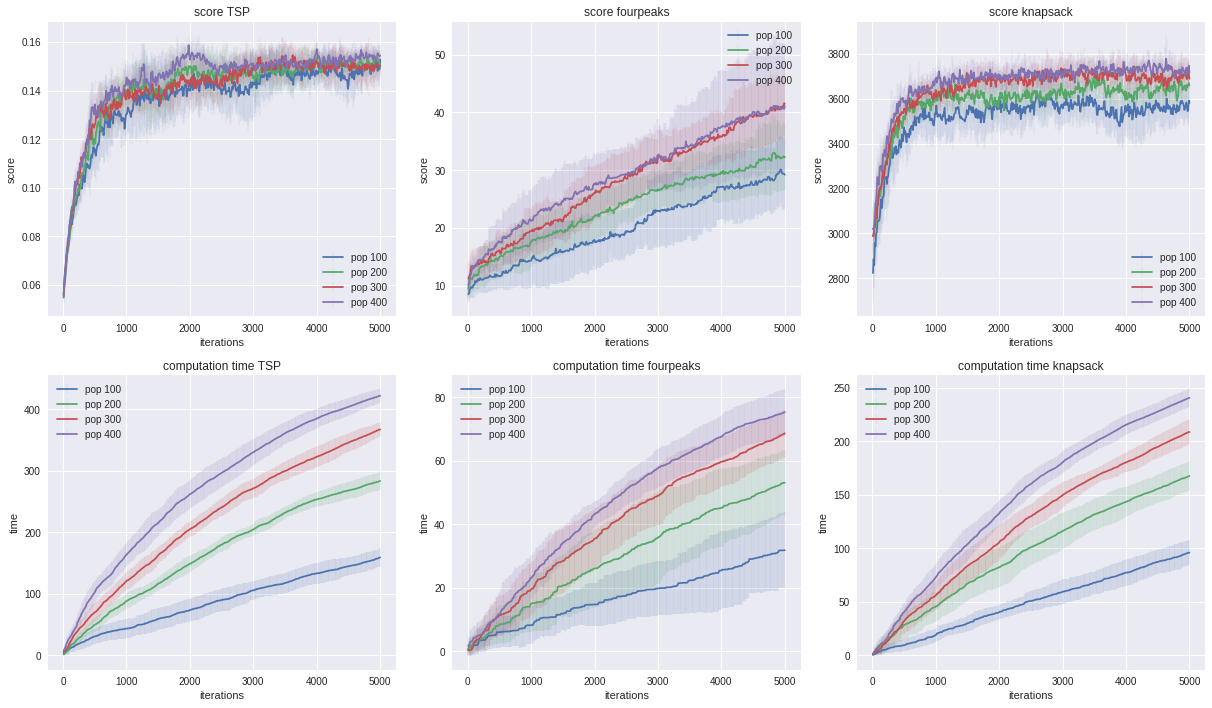

In [90]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10, fig.get_figheight(), forward=True)
fig.set_size_inches(17, fig.get_figwidth(), forward=True)
for ga_id in range(len(all_gas)):
    ga_filtered = []
    for i in range(4):
        pop = (i + 1) * 100
        ga_filtered.append(
            all_gas[ga_id].query(
                '(GA_mate_number=='+str(pop/2)+') & (GA_mutate_number=='+str(pop/2)+') & (GA_population==' + str(pop) + ')')
            .groupby(['GA_mate_number', 'GA_population', 'GA_mutate_number', 'iter'])
            .agg({'value': ['std', 'mean'], 'time': ['std', 'mean']})
        )
        ax[0, ga_id].errorbar(
            ga_filtered[i].index.get_level_values('iter'),
            # np.convolve(ga_filtered[i]['value']['mean'], np.ones((10,))/10, mode='same'),
            ga_filtered[i]['value']['mean'],
            ga_filtered[i]['value']['std'], elinewidth=0.1, label="pop " + str(pop))
        ax[1, ga_id].errorbar(ga_filtered[i].index.get_level_values('iter'), ga_filtered[i]['time']['mean'],
                         ga_filtered[i]['time']['std'], elinewidth=0.1, label="pop " + str(pop))

    ax[0, ga_id].set(xlabel='iterations', ylabel='score',
           title='score '+all_names[ga_id])
    ax[1, ga_id].set(xlabel='iterations', ylabel='time',
           title='computation time '+all_names[ga_id])
    ax[0, ga_id].legend()
    ax[1, ga_id].legend()
pylab.tight_layout()
pylab.savefig('plotter/figs/ga_pop.png')
pylab.show()

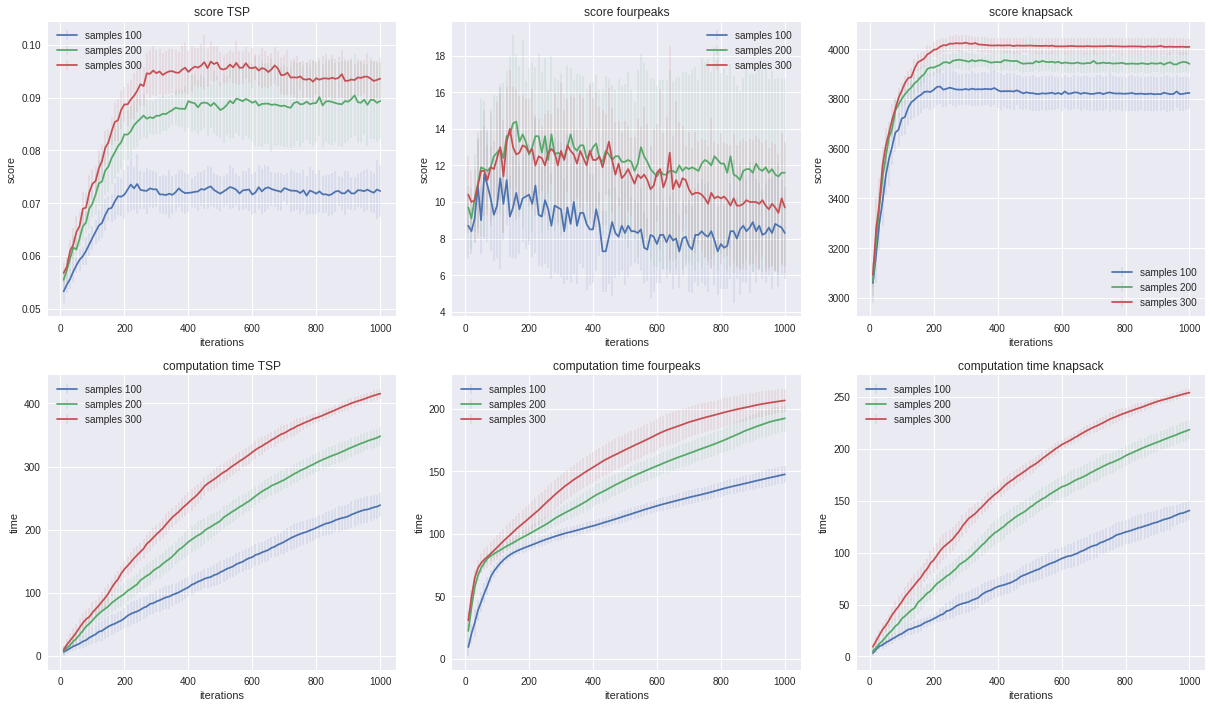

In [89]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10, fig.get_figheight(), forward=True)
fig.set_size_inches(17, fig.get_figwidth(), forward=True)
for mimic_id in range(len(all_gas)):
    mimic_filtered = []
    for i in range(3):
        pop = (i + 1) * 100
        mimic_filtered.append(
            all_mimics[mimic_id].query(
                '(MIMIC_to_keep=='+str(pop/2)+') & (MIMIC_samples==' + str(pop) + ')')
            .groupby(['MIMIC_to_keep', 'MIMIC_samples', 'iter'])
            .agg({'value': ['std', 'mean'], 'time': ['std', 'mean']})
        )
        ax[0, mimic_id].errorbar(
            mimic_filtered[i].index.get_level_values('iter'),
            # np.convolve(ga_filtered[i]['value']['mean'], np.ones((10,))/10, mode='same'),
            mimic_filtered[i]['value']['mean'],
            mimic_filtered[i]['value']['std'], elinewidth=0.2, label="samples " + str(pop))
        ax[1, mimic_id].errorbar(mimic_filtered[i].index.get_level_values('iter'), mimic_filtered[i]['time']['mean'],
                                 mimic_filtered[i]['time']['std'], elinewidth=0.2, label="samples " + str(pop))

    ax[0, mimic_id].set(xlabel='iterations', ylabel='score',
                        title='score '+all_names[mimic_id])
    ax[1, mimic_id].set(xlabel='iterations', ylabel='time',
                        title='computation time '+all_names[mimic_id])
    ax[0, mimic_id].legend()
    ax[1, mimic_id].legend()


pylab.tight_layout()
pylab.savefig('plotter/figs/mimic_samples.png')
pylab.show()

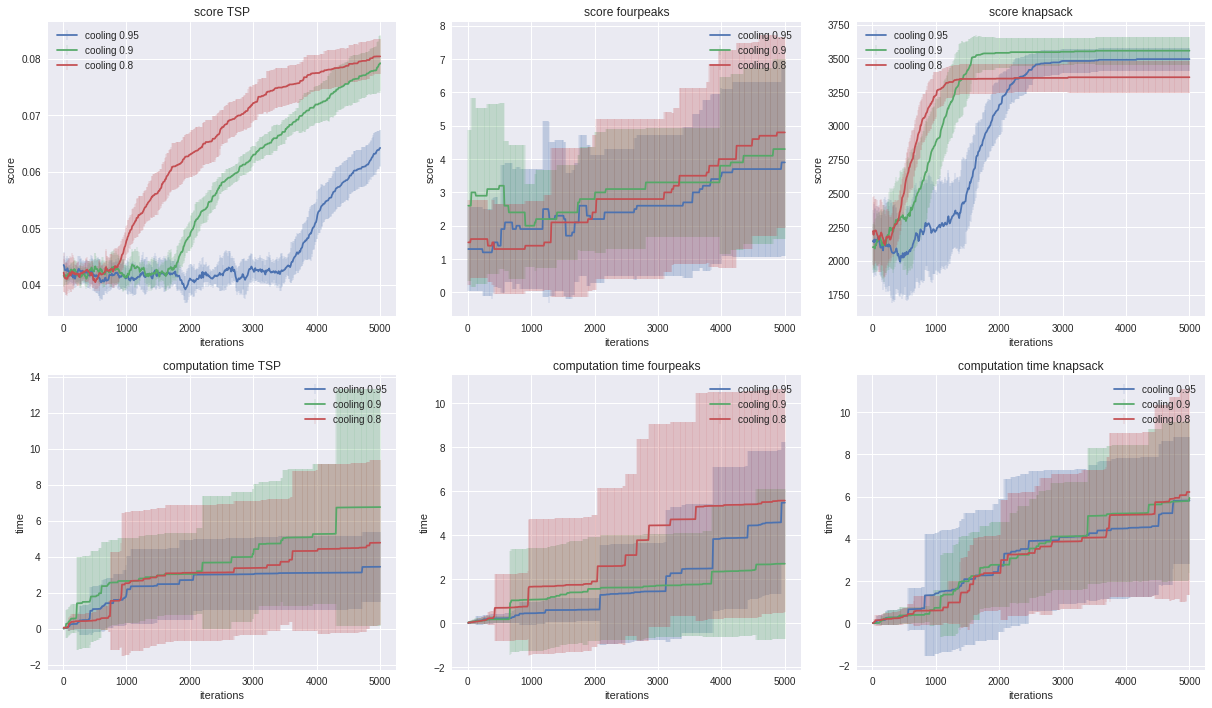

In [88]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10, fig.get_figheight(), forward=True)
fig.set_size_inches(17, fig.get_figwidth(), forward=True)
cool_factors = [0.95, 0.9, 0.8]
for sa_id in range(len(all_gas)):
    sa_filtered = []
    for i in range(len(cool_factors)):
        cooling = cool_factors[i]
        sa_filtered.append(
            all_sas[sa_id].query(
                '(SA_cooling_factor=='+str(cooling)+') & (SA_initial_temperature==1.0E5)')
            .groupby(['SA_cooling_factor', 'SA_initial_temperature', 'iter'])
            .agg({'value': ['std', 'mean'], 'time': ['std', 'mean']})
        )
        ax[0, sa_id].errorbar(
            sa_filtered[i].index.get_level_values('iter'),
            # np.convolve(ga_filtered[i]['value']['mean'], np.ones((10,))/10, mode='same'),
            sa_filtered[i]['value']['mean'],
            sa_filtered[i]['value']['std'], elinewidth=0.2, label="cooling " + str(cooling))
        ax[1, sa_id].errorbar(sa_filtered[i].index.get_level_values('iter'), sa_filtered[i]['time']['mean'],
                              sa_filtered[i]['time']['std'], elinewidth=0.2, label="cooling " + str(cooling))

    ax[0, sa_id].set(xlabel='iterations', ylabel='score',
                     title='score '+all_names[sa_id])
    ax[1, sa_id].set(xlabel='iterations', ylabel='time',
                     title='computation time '+all_names[sa_id])
    ax[0, sa_id].legend()
    ax[1, sa_id].legend()
pylab.tight_layout()
pylab.savefig('plotter/figs/sa_cooling.png')
pylab.show()